# Analysis of monthly return data

Description:


In [1]:
import feather
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
path = '../data/processed/returns.feather'
returns_a = feather.read_dataframe(path)

In [7]:
path = '../data/processed/row_info.feather'
summary = feather.read_dataframe(path)

In [8]:
returns = returns_a.iloc[:,:]
returns.shape

(631232, 3)

## Distribution by date

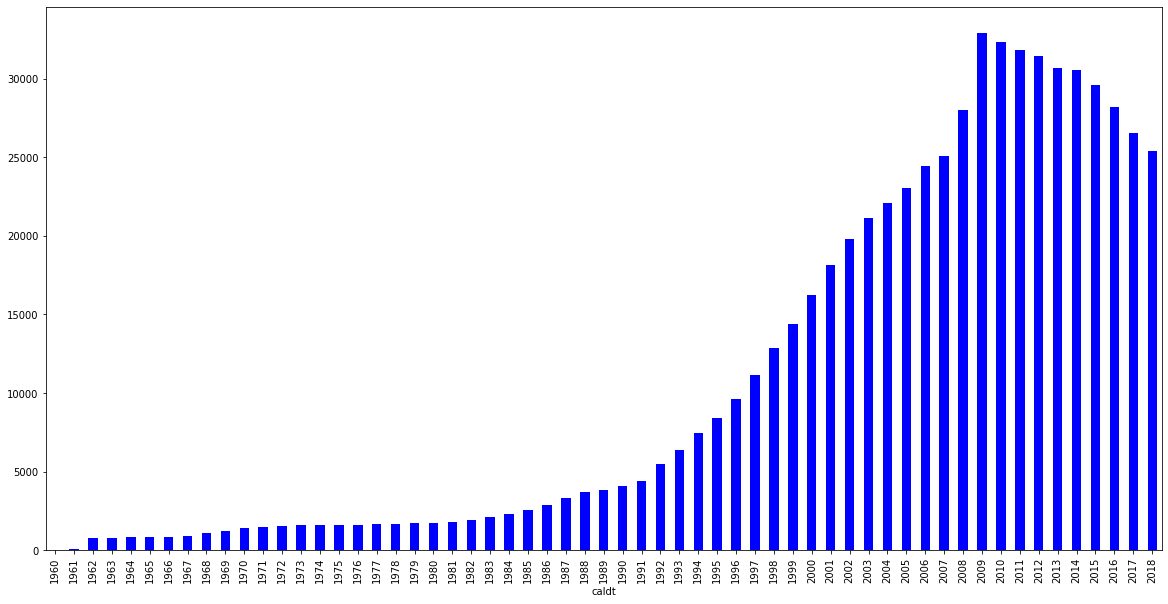

In [9]:
# Analysis of selected funds

## Distribution by date(returns['report_dt']
(returns['crsp_fundno']
    .groupby([
         returns['caldt'].dt.year,
#         returns['caldt'].dt.month
     ])
     .count()
     .plot(kind='bar',
           color = 'b',
          figsize=(20,10)))

## Observations per Fund

In [10]:
# Analysis of selected funds

## Distribution by date(returns['report_dt']
a = (returns['crsp_fundno']
    .groupby([
         returns['crsp_fundno']
     ])
    .count()
)
a = a.groupby(a).count().cumsum().T

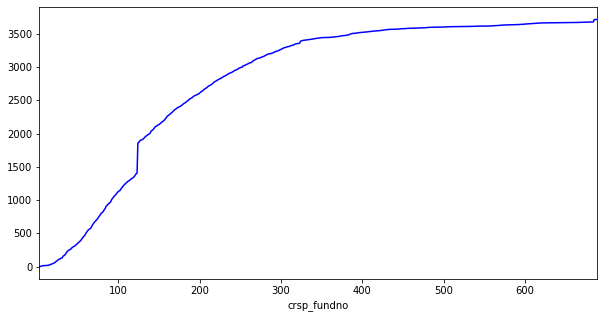

In [12]:
a.plot(kind='line',
       color = 'b',
       figsize=(10,5))

## Map Obj codes to returns

In [16]:
returns_merged = returns.merge(summary[['fund_name','lipper_class','crsp_fundno']], how='left', on=['crsp_fundno'])
returns_merged = returns_merged.dropna(axis = 0, how = 'any')

In [17]:
returns_merged.sample(10)

,crsp_fundno,caldt,mret,fund_name,lipper_class
2294358,11893,1971-04-30,0.027256,Fidelity Hastings Street Trust: Fidelity Fund,LCCE
7232852,30929,1999-02-26,-0.040809,"Value Line Larger Companies Focused Fund, Inc;...",LCCE
6509914,28627,1977-04-29,-0.022321,"Sequoia Fund, Inc",MLGE
3241968,15080,1999-11-30,0.026678,"Heartland Group, Inc: Heartland Select Value F...",MLVE
6133600,27079,1999-02-26,-0.089002,Royce Fund: Royce Small/Mid-Cap Premier Fund; ...,MCCE
7154031,30873,2015-05-29,0.005857,VALIC Company I: Small Cap Special Values Fund,SCVE
1399562,8053,1992-04-30,0.003434,COUNTRY Mutual Funds Trust: COUNTRY Growth Fun...,LCCE
5274676,23478,2007-12-31,-0.006809,PIMCO Funds: PIMCO StocksPLUS Fund; Institutio...,LCCE
3200761,14841,2012-07-31,0.010614,"Hartford Mutual Funds, Inc: Hartford Core Equi...",LCCE
7231905,30929,1995-07-31,0.077711,"Value Line Larger Companies Focused Fund, Inc;...",LCGE


## Aggregate return

In [19]:
# Analysis of selected funds
return_class = returns_merged[returns_merged['lipper_class'] == 'LCCE']

In [20]:
return_class = (return_class['mret']
    .groupby([
        return_class['lipper_class'],
        return_class['caldt']
     ])
    .agg(['mean','count']))

In [21]:
return_class.loc[:,'cumulative'] = (return_class.loc[:,'mean'].fillna(0)+1).cumprod()

Cum return over time

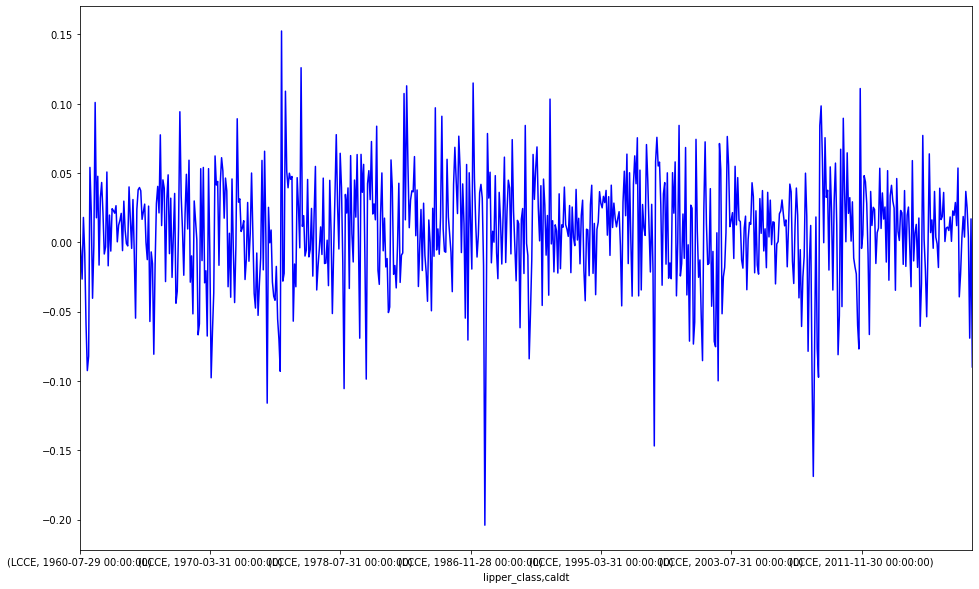

In [22]:
return_class['mean'].plot(kind='line',
           color = 'b',
          figsize=(16,10))

Different from zero?

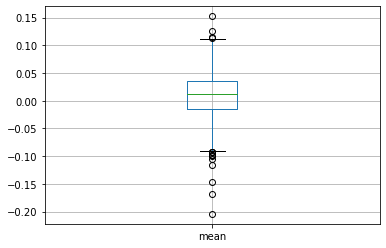

In [23]:
return_class.loc[:,['mean']].boxplot()

## Objective codes

In [28]:
return_class.sample()

,,mean,count,cumulative
lipper_class,caldt,,,
LCCE,2016-10-31,-0.018167,5550,149.864755


In [32]:
returns_grouped = (return_class['cumulative']
    .groupby(
        level=[0]))

In [33]:
returns_grouped = returns_grouped.describe()

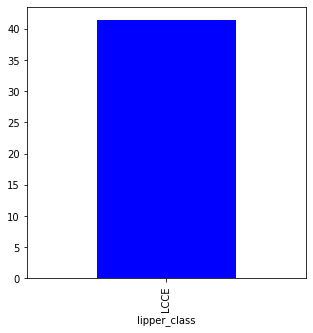

In [35]:
returns_grouped['mean'].sort_values().plot(
            kind='bar',
            color = 'b',
            figsize=(5,5))